In [1]:
import torch
print(torch.__version__)

2.0.1+cu117


In [1]:
import os
from pathlib import Path

def print_directory_tree(root_dir, exclude_dirs=None, max_depth=None, output_file=None):
    """
    递归打印目录树结构
    
    :param root_dir: 要遍历的根目录路径
    :param exclude_dirs: 需要排除的目录列表（默认排除.git等）
    :param max_depth: 最大遍历深度（None表示无限制）
    :param output_file: 输出文件路径（None则打印到控制台）
    """
    # 默认排除的目录
    if exclude_dirs is None:
        exclude_dirs = {'.git', '__pycache__', '.idea', 'venv', 'env'}
    
    # 结果缓冲区
    tree = []
    
    # 遍历目录树
    root_path = Path(root_dir).resolve()
    prefix = ""
    
    for root, dirs, files in os.walk(root_path):
        # 转换相对路径
        relative_path = os.path.relpath(root, root_path)
        
        # 排除目录处理
        dirs[:] = [d for d in dirs if d not in exclude_dirs]
        
        # 计算缩进层级
        level = relative_path.count(os.sep)
        if relative_path == ".":
            level = 0
        
        # 处理最大深度
        if max_depth is not None and level > max_depth:
            continue
        
        # 添加目录条目
        if relative_path != ".":
            indent = "│   " * (level-1)
            tree.append(f"{indent}├── {os.path.basename(root)}/")
        
        # 添加文件条目
        indent = "│   " * level
        for i, f in enumerate(sorted(files)):
            # 判断是否是最后一个文件
            if i == len(files)-1 and not dirs:
                connector = "└── "
            else:
                connector = "├── "
            
            tree.append(f"{indent}{connector}{f}")
    
    # 处理输出
    output = "\n".join([f"{root_dir}/"] + tree)
    
    if output_file:
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write(output)
    else:
        print(output)

if __name__ == "__main__":
    # 使用示例
    current_dir = os.getcwd()  # 获取当前目录
    print_directory_tree(
        root_dir=current_dir,
        exclude_dirs={'.git', '__pycache__', '.idea'},  # 自定义排除目录
        max_depth=4,  # 限制遍历深度
        output_file="directory_tree.txt"  # 输出到文件
    )

In [1]:
from cdcore.cd_model_zoo import create_cd_model
import torch
from fvcore.nn import FlopCountAnalysis, parameter_count
# 创建模型
model = create_cd_model('cbf-hky', dataset='dfc25_track2')
# 准备输入数据
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 创建输入张量
input_tensor_1 = torch.randn(1, 3, 256, 256)
input_tensor_2 = torch.randn(1, 1, 256, 256)

# 将输入张量移动到 GPU
input_tensor_1 = input_tensor_1.to(device)
input_tensor_2 = input_tensor_2.to(device)
model = model.to(device)

print(model)
# 假设你的模型为 model，输入张量为 input_tensor_1 和 input_tensor_2
sample ={
    "image":input_tensor_1,
    "t2_image":input_tensor_2,
}
# 计算 FLOPs
flop_analysis = FlopCountAnalysis(model, (sample))
flops = flop_analysis.total()
gflops = flops / 1e9  # 转换为 GFLOPs
print("GFLOPs:", gflops)
flop_analysis.by_operator()
flop_analysis.by_module_and_operator()
# 计算参数

# 计算参数
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# 将参数数量转换为百万（M）
total_params_m = total_params / 1e6  # 转换为百万参数
trainable_params_m = trainable_params / 1e6  # 转换为百万参数

print(f"Total Parameters: {total_params_m:.2f} M")
print(f"Trainable Parameters: {trainable_params_m:.2f} M")



/opt/conda/envs/compete2/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


segmentor(
  (backbone1): FeatureListNet(
    (stem_0): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
    (stem_1): LayerNorm2d((128,), eps=1e-06, elementwise_affine=True)
    (stages_0): ConvNeXtStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): ConvNeXtBlock(
          (conv_dw): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (norm): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=128, out_features=512, bias=True)
            (act): GELU()
            (drop1): Dropout(p=0.0, inplace=False)
            (norm): Identity()
            (fc2): Linear(in_features=512, out_features=128, bias=True)
            (drop2): Dropout(p=0.0, inplace=False)
          )
          (shortcut): Identity()
          (drop_path): Identity()
        )
        (1): ConvNeXtBlock(
          (conv_dw): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), gr

Unsupported operator aten::gelu encountered 119 time(s)
Unsupported operator aten::mul encountered 150 time(s)
Unsupported operator aten::add encountered 88 time(s)
Unsupported operator aten::bernoulli_ encountered 70 time(s)
Unsupported operator aten::div_ encountered 70 time(s)
Unsupported operator aten::clone encountered 8 time(s)
Unsupported operator aten::sub encountered 5 time(s)
Unsupported operator aten::abs encountered 5 time(s)
Unsupported operator aten::feature_dropout encountered 1 time(s)


GFLOPs: 51.0108928
Total Parameters: 184.89 M
Trainable Parameters: 184.89 M


In [ ]:
from cdcore.cd_model_zoo import create_cd_model
import torch
from fvcore.nn import FlopCountAnalysis, parameter_count
# 创建模型
model = create_cd_model('cbf-hky', dataset='dfc25_track2')
# 准备输入数据
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 创建输入张量
input_tensor_1 = torch.randn(1, 3, 256, 256)
input_tensor_2 = torch.randn(1, 1, 256, 256)

# 将输入张量移动到 GPU
input_tensor_1 = input_tensor_1.to(device)
input_tensor_2 = input_tensor_2.to(device)
model = model.to(device)

print(model)
# 假设你的模型为 model，输入张量为 input_tensor_1 和 input_tensor_2
sample ={
    "image":input_tensor_1,
    "t2_image":input_tensor_2,
}
# 计算 FLOPs
flop_analysis = FlopCountAnalysis(model, (sample))
flops = flop_analysis.total()
gflops = flops / 1e9  # 转换为 GFLOPs
print("GFLOPs:", gflops)
flop_analysis.by_operator()
flop_analysis.by_module_and_operator()
# 计算参数

# 计算参数
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# 将参数数量转换为百万（M）
total_params_m = total_params / 1e6  # 转换为百万参数
trainable_params_m = trainable_params / 1e6  # 转换为百万参数

print(f"Total Parameters: {total_params_m:.2f} M")
print(f"Trainable Parameters: {trainable_params_m:.2f} M")



/opt/conda/envs/compete2/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Unexpected keys (head.fc.fc1.bias, head.fc.fc1.weight, head.fc.fc2.bias, head.fc.fc2.weight, head.fc.norm.bias, head.fc.norm.weight) found while loading pretrained weights. This may be expected if model is being adapted.
Unexpected keys (head.fc.fc1.bias, head.fc.fc1.weight, head.fc.fc2.bias, head.fc.fc2.weight, head.fc.norm.bias, head.fc.norm.weight) found while loading pretrained weights. This may be expected if model is being adapted.


segmentor(
  (backbone1): FeatureListNet(
    (stem): Stem(
      (conv): Conv2d(3, 96, kernel_size=(7, 7), stride=(4, 4), padding=(2, 2))
      (norm): LayerNorm2dNoBias((96,), eps=1e-06, elementwise_affine=True)
    )
    (stages_0): MetaFormerStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): MetaFormerBlock(
          (norm1): LayerNorm2dNoBias((96,), eps=1e-06, elementwise_affine=True)
          (token_mixer): SepConv(
            (pwconv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (act1): StarReLU(
              (relu): ReLU()
            )
            (dwconv): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=192, bias=False)
            (act2): Identity()
            (pwconv2): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          )
          (drop_path1): Identity()
          (layer_scale1): Identity()
          (res_scale1): Identity()
          (norm2): LayerNorm2dNoBia

Unsupported operator aten::pow encountered 144 time(s)
Unsupported operator aten::mul encountered 376 time(s)
Unsupported operator aten::add encountered 309 time(s)
Unsupported operator aten::bernoulli_ encountered 140 time(s)
Unsupported operator aten::div_ encountered 140 time(s)
Unsupported operator aten::gelu encountered 43 time(s)
Unsupported operator aten::clone encountered 8 time(s)
Unsupported operator aten::sub encountered 5 time(s)
Unsupported operator aten::abs encountered 5 time(s)
Unsupported operator aten::feature_dropout encountered 1 time(s)


GFLOPs: 39.840423232
Total Parameters: 111.08 M
Trainable Parameters: 111.08 M


: 

In [5]:
from urllib.request import urlopen
from PIL import Image
import timm

import torch
model = timm.create_model(
    'convformer_m36.sail_in22k',
    pretrained=False,
    features_only=True,
)
model = model.eval()
input_tensor_1 = torch.randn(1, 3, 700, 700)
# get model specific transforms (normalization, resize)

output = model(input_tensor_1)  # unsqueeze single image into batch of 1

for o in output:
    # print shape of each feature map in output
    # e.g.:
    #  torch.Size([1, 64, 256, 256])
    #  torch.Size([1, 64, 128, 128])
    #  torch.Size([1, 128, 64, 64])
    #  torch.Size([1, 256, 32, 32])
    #  torch.Size([1, 512, 16, 16])

    print(o.shape)


torch.Size([1, 96, 175, 175])
torch.Size([1, 192, 88, 88])
torch.Size([1, 384, 44, 44])
torch.Size([1, 576, 22, 22])


In [1]:
from cdcore.cd_model_zoo import create_cd_model
import torch
model = create_cd_model('cbf-hky', dataset='dfc25_track2')
# 准备输入数据
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 创建输入张量
input_tensor_1 = torch.randn(1, 3, 512, 512)
input_tensor_2 = torch.randn(1, 1, 512, 512)

# 将输入张量移动到 GPU
input_tensor_1 = input_tensor_1.to(device)
input_tensor_2 = input_tensor_2.to(device)
model = model.to(device)

print(model)
# 假设你的模型为 model，输入张量为 input_tensor_1 和 input_tensor_2
sample ={
    "image":input_tensor_1,
    "t2_image":input_tensor_2,
}
output = model(sample)  # unsqueeze single image into batch of 1



/opt/conda/envs/compete2/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


segmentor(
  (backbone1): FeatureListNet(
    (stem): Stem(
      (conv): Conv2d(3, 96, kernel_size=(7, 7), stride=(4, 4), padding=(2, 2))
      (norm): LayerNorm2dNoBias((96,), eps=1e-06, elementwise_affine=True)
    )
    (stages_0): MetaFormerStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): MetaFormerBlock(
          (norm1): LayerNorm2dNoBias((96,), eps=1e-06, elementwise_affine=True)
          (token_mixer): SepConv(
            (pwconv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (act1): StarReLU(
              (relu): ReLU()
            )
            (dwconv): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=192, bias=False)
            (act2): Identity()
            (pwconv2): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          )
          (drop_path1): Identity()
          (layer_scale1): Identity()
          (res_scale1): Identity()
          (norm2): LayerNorm2dNoBia

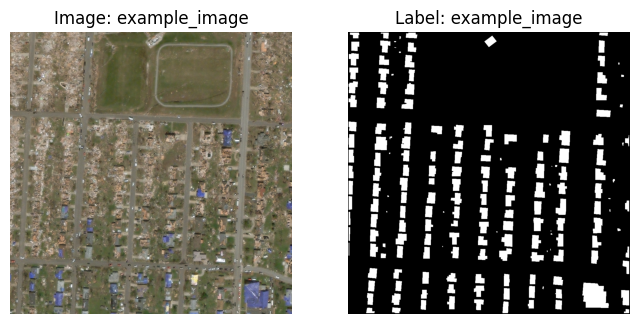

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

class ImageProcessor:
    def __init__(self, image_root, mask_root, imagetype=".png"):
        self.image_root = image_root
        self.mask_root = mask_root
        self.imagetype = imagetype

    def change_onehot(self, label):
        label_out = np.zeros(label.shape, dtype=label.dtype)
        label_out[label != 0] = 1  # 将所有非零值置为 1，零值保持为 0
        return label_out

    def show_image_and_label(self, name):
        # 构造文件路径
        image_path = f"{self.image_root}"

        # 加载图像
        image = io.imread(image_path)

        # 显示图像
        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)  # 图像显示在左侧
        plt.imshow(image)  # 灰度显示图像
        plt.title(f"Image: {name}")
        plt.axis('off')  # 关闭坐标轴

        # 加载变更掩码（如果提供）
        label = None
        if self.mask_root:
            label_path = f"{self.mask_root}"
            label = io.imread(label_path, as_gray=True)
            label = self.change_onehot(label)

            # 显示标签
            plt.subplot(1, 2, 2)  # 标签显示在右侧
            plt.imshow(label, cmap='gray')  # 灰度显示标签
            plt.title(f"Label: {name}")
            plt.axis('off')  # 关闭坐标轴

        # 显示图像和标签
        plt.show()

# 假设 image_root 和 mask_root 已经定义，并且有正确的图像路径
image_processor = ImageProcessor(image_root="/opt/data/private/competition/pretrain_dataset/tier3/images/joplin-tornado_00000000_post_disaster.png", mask_root="/opt/data/private/competition/pretrain_dataset/tier3/targets/joplin-tornado_00000000_post_disaster_target.png")
image_processor.show_image_and_label("example_image")


TypeError: Image data of dtype object cannot be converted to float

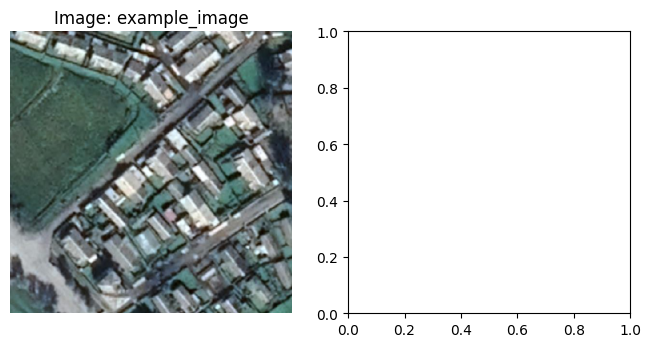

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

class ImageProcessor:
    def __init__(self, image_root, mask_root, imagetype=".png"):
        self.image_root = image_root
        self.mask_root = mask_root
        self.imagetype = imagetype

    def change_onehot(self, label):
        class_values = [255,0]
        label_out = np.zeros(label.shape, dtype=label.dtype)
        for idx, class_value in enumerate(class_values):
            label_out[label == class_value] = idx

    def show_image_and_label(self, name):
        # 构造文件路径
        image_path = f"{self.image_root}"

        # 加载图像
        image = io.imread(image_path)

        # 显示图像
        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)  # 图像显示在左侧
        plt.imshow(image)  # 灰度显示图像
        plt.title(f"Image: {name}")
        plt.axis('off')  # 关闭坐标轴

        # 加载变更掩码（如果提供）
        label = None
        if self.mask_root:
            label_path = f"{self.mask_root}"
            label = io.imread(label_path, as_gray=True)
            label = self.change_onehot(label)

            # 显示标签
            plt.subplot(1, 2, 2)  # 标签显示在右侧
            plt.imshow(label, cmap='gray')  # 灰度显示标签
            plt.title(f"Label: {name}")
            plt.axis('off')  # 关闭坐标轴

        # 显示图像和标签
        plt.show()

# 假设 image_root 和 mask_root 已经定义，并且有正确的图像路径
image_processor = ImageProcessor(image_root="/opt/data/private/competition/pretrain_dataset/whu_mix_train/image/asia_train_0.tif", mask_root="/opt/data/private/competition/pretrain_dataset/whu_mix_train/label/asia_train_0.tif")
image_processor.show_image_and_label("example_image")


## 将checkpiont 转换为 checkpoint_new

In [2]:
import torch

def modify_checkpoint_keys(input_path, output_path, ema_key=0.9998, old_str='_orig_mod.', new_str=''):
    """
    修改检查点文件中EMA部分的键名并保存新文件
    
    :param input_path: 原始检查点文件路径
    :param output_path: 新检查点保存路径
    :param ema_key: EMA字典中的键（默认0.9998）
    :param old_str: 需要替换的旧字符串（默认'_orig_mod.'）
    :param new_str: 替换后的新字符串（默认空字符串）
    """
    checkpoint = torch.load(input_path, map_location='cpu')
    new_checkpoint = checkpoint.copy()

    if 'ema' in new_checkpoint:
        ema_dict = new_checkpoint['ema']
        if ema_key in ema_dict:

            new_ema_subdict = {}
            ema_subdict = ema_dict[ema_key]

            for key, value in ema_subdict.items():
                new_key = key.replace(old_str, new_str)
                new_ema_subdict[new_key] = value

            ema_dict[ema_key] = new_ema_subdict
            new_checkpoint['ema'] = ema_dict
        else:
            print(f"Warning: EMA key {ema_key} not found. No changes made to EMA weights.")
    else:
        print("Warning: 'ema' section not found in checkpoint. No modifications applied.")
    torch.save(new_checkpoint, output_path)
    print(f"Successfully saved modified checkpoint to: {output_path}")

checkpoint_path = r"/opt/data/private/competition/code/dfc25_track2_pretrain/checkpoint/checkpoint.pt"
new_checkpoint_path = r"/opt/data/private/competition/code/dfc25_track2_pretrain/checkpoint/checkpoint_new.pt"

modify_checkpoint_keys(
    input_path=checkpoint_path,
    output_path=new_checkpoint_path
)

Successfully saved modified checkpoint to: /opt/data/private/competition/code/dfc25_track2_pretrain/checkpoint/checkpoint_new.pt


## 通过模型文件查看预训练模型名、计算预训练模型大小

In [ ]:
from segcore.seg_model_zoo import create_seg_model
import torch
from fvcore.nn import FlopCountAnalysis, parameter_count
# 创建模型
model = create_seg_model('hky-pretrain', dataset='pretrain')
# 准备输入数据
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 创建输入张量
input_tensor_1 = torch.randn(1, 3, 256, 256)

# 将输入张量移动到 GPU
input_tensor_1 = input_tensor_1.to(device)
model = model.to(device)

print(model)
sample ={
    "image":input_tensor_1,
}
# 计算 FLOPs
flop_analysis = FlopCountAnalysis(model, (sample))
flops = flop_analysis.total()
gflops = flops / 1e9  # 转换为 GFLOPs
print("GFLOPs:", gflops)
flop_analysis.by_operator()
flop_analysis.by_module_and_operator()
# 计算参数

# 计算参数
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# 将参数数量转换为百万（M）
total_params_m = total_params / 1e6  # 转换为百万参数
trainable_params_m = trainable_params / 1e6  # 转换为百万参数

print(f"Total Parameters: {total_params_m:.2f} M")
print(f"Trainable Parameters: {trainable_params_m:.2f} M")

## 查看checkpoint的模型结构

In [2]:
import torch
import os
from collections import OrderedDict
import pandas as pd

def print_model_keys(checkpoint_path, name="模型"):
    """
    打印模型 checkpoint 中所有键的名称和形状
    """
    if not os.path.exists(checkpoint_path):
        print(f"{name} 文件不存在: {checkpoint_path}")
        return None
    
    try:
        checkpoint = torch.load(checkpoint_path, map_location='cpu')
        
        # 检查 checkpoint 的类型
        if isinstance(checkpoint, dict):
            if 'model' in checkpoint:
                state_dict = checkpoint['model']
            elif 'state_dict' in checkpoint:
                state_dict = checkpoint['state_dict']
            else:
                state_dict = checkpoint
        else:
            state_dict = checkpoint
            
        print(f"\n{name} 的键:")
        keys_info = []
        
        for key, value in state_dict.items():
            if isinstance(value, torch.Tensor):
                shape_str = str(tuple(value.shape))
                keys_info.append((key, shape_str, value.dtype))
                print(f"  {key} - 形状: {shape_str}, 类型: {value.dtype}")
            else:
                keys_info.append((key, "非张量", type(value).__name__))
                print(f"  {key} - 非张量, 类型: {type(value).__name__}")
        
        return keys_info
    except Exception as e:
        print(f"加载 {name} 时出错: {str(e)}")
        return None

def compare_model_keys(checkpoint1_path, checkpoint2_path):
    """
    比较两个模型 checkpoint 的键
    """
    print("=" * 80)
    print(f"比较模型文件:")
    print(f"模型1: {checkpoint1_path}")
    print(f"模型2: {checkpoint2_path}")
    print("=" * 80)
    
    keys1 = print_model_keys(checkpoint1_path, "模型1")
    keys2 = print_model_keys(checkpoint2_path, "模型2")
    
    if keys1 is None or keys2 is None:
        return
    
    # 转换为集合以便比较
    keys1_set = {k[0] for k in keys1}
    keys2_set = {k[0] for k in keys2}
    
    # 比较两个模型的键
    only_in_model1 = keys1_set - keys2_set
    only_in_model2 = keys2_set - keys1_set
    common_keys = keys1_set & keys2_set
    
    print("\n比较结果:")
    print(f"  共有键: {len(common_keys)}")
    print(f"  只在模型1中存在的键: {len(only_in_model1)}")
    print(f"  只在模型2中存在的键: {len(only_in_model2)}")
    
    if only_in_model1:
        print("\n只在模型1中存在的键:")
        for key in sorted(only_in_model1):
            print(f"  {key}")
    
    if only_in_model2:
        print("\n只在模型2中存在的键:")
        for key in sorted(only_in_model2):
            print(f"  {key}")
    
    # 检查共有键的形状是否一致
    print("\n检查共有键的形状是否一致:")
    shape_diff = []
    
    for key in sorted(common_keys):
        shape1 = next(item[1] for item in keys1 if item[0] == key)
        shape2 = next(item[1] for item in keys2 if item[0] == key)
        
        if shape1 != shape2:
            shape_diff.append((key, shape1, shape2))
            print(f"  {key} - 模型1形状: {shape1}, 模型2形状: {shape2}")
    
    if not shape_diff:
        print("  所有共有键的形状均一致")

# 主函数
def main():
    checkpoint_path = r"/opt/data/private/competition/code/dfc25_track2_pretrain/checkpoint/checkpoint.pt"
    new_checkpoint_path = r"/opt/data/private/competition/code/dfc25_track2_pretrain/checkpoint/checkpoint_new.pt"
    
    compare_model_keys(checkpoint_path, new_checkpoint_path)

if __name__ == "__main__":
    main()

比较模型文件:
模型1: /opt/data/private/competition/code/dfc25_track2_pretrain/checkpoint/checkpoint.pt
模型2: /opt/data/private/competition/code/dfc25_track2_pretrain/checkpoint/checkpoint_new.pt

模型1 的键:
  backbone1.stem_0.weight - 形状: (96, 3, 4, 4), 类型: torch.float32
  backbone1.stem_0.bias - 形状: (96,), 类型: torch.float32
  backbone1.stem_1.weight - 形状: (96,), 类型: torch.float32
  backbone1.stem_1.bias - 形状: (96,), 类型: torch.float32
  backbone1.stages_0.blocks.0.gamma - 形状: (96,), 类型: torch.float32
  backbone1.stages_0.blocks.0.conv_dw.weight - 形状: (96, 1, 7, 7), 类型: torch.float32
  backbone1.stages_0.blocks.0.conv_dw.bias - 形状: (96,), 类型: torch.float32
  backbone1.stages_0.blocks.0.norm.weight - 形状: (96,), 类型: torch.float32
  backbone1.stages_0.blocks.0.norm.bias - 形状: (96,), 类型: torch.float32
  backbone1.stages_0.blocks.0.mlp.fc1.weight - 形状: (384, 96), 类型: torch.float32
  backbone1.stages_0.blocks.0.mlp.fc1.bias - 形状: (384,), 类型: torch.float32
  backbone1.stages_0.blocks.0.mlp.fc2.weight - 形状